##  K-means clustering
In this part of exercise, you will implement the K-means clustering algorithm and
apply it to compress an image.

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def findClosestCentroids(X, centroids):
    #FINDCLOSESTCENTROIDS computes the centroid memberships for every example
    #   idx = FINDCLOSESTCENTROIDS (X, centroids) returns the closest centroids
    #   in idx for a dataset X where each row is a single example. idx = m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly.
    # from http://stackoverflow.com/a/24261734/583834
    # to avoid error "arrays used as indices must be of integer (or boolean) type"
    idx = np.zeros((X.shape[0], 1), dtype=np.int8)

    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every example, find its closest centroid, and store
    #               the index inside idx at the appropriate location.
    #               Concretely, idx(i) should contain the index of the centroid
    #               closest to example i. Hence, it should be a value in the 
    #               range 1..K
    #
    # Note: You can use a for-loop over the examples to compute this.
    #

    # set m = # of training examples
    m = X.shape[0]

    # for every training example
    for i in range(m):

        # for every centroid
        for j in range(K):

            # compute the euclidean distance between the example and the centroid
            difference = X[i,:]-centroids[j,:]
            distance = np.power(np.sqrt( difference.dot(difference.T) ), 2)

            # if this is the first centroid, initialize the min_distance and min_centroid
            # OR 
            # if distance < min_distance, reassign min_distance=distance and min_centroid to current j
            if j == 0 or distance < min_distance:
                min_distance = distance
                min_centroid = j
        # assign centroid for this example to one corresponding to the min_distance 
        idx[i]= min_centroid

    return idx

In [5]:
## ================= Part 1: Find Closest Centroids ====================
#  To help you implement K-Means, we have divided the learning algorithm 
#  into two functions -- findClosestCentroids and computeCentroids. In this
#  part, you shoudl complete the code in the findClosestCentroids function. 
#
print('Finding closest centroids.\n')

# Load an example dataset that we will be using
mat = scipy.io.loadmat('data/ex7/ex7data2.mat')
X = mat["X"]

# Select an initial set of centroids
K = 3 # 3 Centroids
initial_centroids = np.array( [[3, 3], [6, 2], [8, 5]] )

# Find the closest centroids for the examples using the
# initial_centroids
idx = findClosestCentroids(X, initial_centroids)

print('Closest centroids for the first 3 examples: \n')
print(' {:s}'.format( str(idx[:3]) ))
# adjusted next string for python's 0-indexing
print('\n(the closest centroids should be 0, 2, 1 respectively)\n')

Finding closest centroids.

Closest centroids for the first 3 examples: 

 [[0]
 [2]
 [1]]

(the closest centroids should be 0, 2, 1 respectively)



In [7]:
def computeCentroids(X, idx, K):
    #COMPUTECENTROIDS returs the new centroids by computing the means of the 
    #data points assigned to each centroid.
    #   centroids = COMPUTECENTROIDS(X, idx, K) returns the new centroids by 
    #   computing the means of the data points assigned to each centroid. It is
    #   given a dataset X where each row is a single data point, a vector
    #   idx of centroid assignments (i.e. each entry in range [1..K]) for each
    #   example, and K, the number of centroids. You should return a matrix
    #   centroids, where each row of centroids is the mean of the data points
    #   assigned to it.
    #

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly.
    centroids = np.zeros((K, n))


    # ====================== YOUR CODE HERE ======================
    # Instructions: Go over every centroid and compute mean of all points that
    #               belong to it. Concretely, the row vector centroids(i, :)
    #               should contain the mean of the data points assigned to
    #               centroid i.
    #
    # Note: You can use a for-loop over the centroids to compute this.
    #

    # for each centroid
    for j in range(K):
    	
    	# find training example indices that are assigned to current centroid
        # notice the [0] indexing - it's necessary because of np.nonzero()'s 
        #   two-array output
    	centroid_examples = np.nonzero(idx == j)[0]

    	# compute mean over all such training examples and reassign centroid
    	centroids[j,:] = np.mean( X[centroid_examples,:], axis=0 )

    return centroids

In [8]:
## ===================== Part 2: Compute Means =========================
#  After implementing the closest centroids function, you should now
#  complete the computeCentroids function.
#
print('\nComputing centroids means.\n')

#  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids: \n')
print(' {:s} '.format(str(centroids)))
print('\n(the centroids should be\n')
print('   [ 2.428301 3.157924 ]\n')
print('   [ 5.813503 2.633656 ]\n')
print('   [ 7.119387 3.616684 ]\n\n')


Computing centroids means.

Centroids computed after initial finding of closest centroids: 

 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]] 

(the centroids should be

   [ 2.428301 3.157924 ]

   [ 5.813503 2.633656 ]

   [ 7.119387 3.616684 ]




In [23]:
from matplotlib import colors
def hsv(n=63):
    """
    adapted from Octave's (NOT matlab's) hsv(N) function
      which is equivalent to matlab's hsv2rgb([(0:N-1)'/N, ones(N,2)])
      from: http://octave.sourceforge.net/octave/function/hsv.html
            http://stackoverflow.com/q/23945764/583834
    """
    # return colors.hsv_to_rgb( np.column_stack([ np.array(range(n+1)).T / float(n), np.ones( ((n+1), 2) ) ]) )
    return colors.hsv_to_rgb( np.column_stack([ np.linspace(0, 1, n+1), np.ones( ((n+1), 2) ) ]) )
def plotDataPoints(X, idx, K):
    #PLOTDATAPOINTS plots data points in X, coloring them so that those with the same
    #index assignments in idx have the same color
    #   PLOTDATAPOINTS(X, idx, K) plots data points in X, coloring them so that those 
    #   with the same index assignments in idx have the same color
    # Create palette (see hsv.py)
    palette = hsv( K )
    colors = np.array([palette[int(i)] for i in idx])
    # Plot the data
    plt.scatter(X[:,0], X[:,1], s=75, facecolors='none', edgecolors=colors)
    return
def drawLine(p1, p2, **kwargs):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)
def plotProgresskMeans(X, centroids, previous, idx, K, i):
    #PLOTPROGRESSKMEANS is a helper function that displays the progress of 
    #k-Means as it is running. It is intended for use only with 2D data.
    #   PLOTPROGRESSKMEANS(X, centroids, previous, idx, K, i) plots the data
    #   points with colors assigned to each centroid. With the previous
    #   centroids, it also plots a line between the previous locations and
    #   current locations of the centroids.
    #

    # plt.hold(True)

    # Plot the examples
    plotDataPoints(X, idx, K)

    # Plot the centroids as black x's
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=400, c='k', linewidth=1)

    # Plot the history of the centroids with lines
    for j in range(centroids.shape[0]):
        drawLine(centroids[j, :], previous[j, :], c='b')
    # Title
    plt.title('Iteration number {:d}'.format(i+1))
    return

In [17]:
def runkMeans(X, initial_centroids, max_iters, plot_progress=False):
    #RUNKMEANS runs the K-Means algorithm on data matrix X, where each row of X
    #is a single example
    #   [centroids, idx] = RUNKMEANS(X, initial_centroids, max_iters, ...
    #   plot_progress) runs the K-Means algorithm on data matrix X, where each 
    #   row of X is a single example. It uses initial_centroids used as the
    #   initial centroids. max_iters specifies the total number of interactions 
    #   of K-Means to execute. plot_progress is a true/false flag that 
    #   indicates if the function should also plot its progress as the 
    #   learning happens. This is set to false by default. runkMeans returns 
    #   centroids, a Kxn matrix of the computed centroids and idx, a m x 1 
    #   vector of centroid assignments (i.e. each entry in range [1..K])
    #

    # Set default value for plot progress
    # (commented out due to pythonic default parameter assignment above)
    # if not plot_progress:
    #     plot_progress = False

    # Plot the data if we are plotting progress
    # if plot_progress:
    #     plt.hold(True)

    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m, 1))

    # if plotting, set up the space for interactive graphs
    # http://stackoverflow.com/a/4098938/583834
    # http://matplotlib.org/faq/usage_faq.html#what-is-interactive-mode
    if plot_progress:
        plt.close()
        plt.ion()

    # Run K-Means
    for i in range(max_iters):
        
        # Output progress
        print('K-Means iteration {:d}/{:d}...'.format(i+1, max_iters))
        
        # For each example in X, assign it to the closest centroid
        idx = findClosestCentroids(X, centroids)
        
        # Optionally, plot progress here
        if plot_progress:
            plotProgresskMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            #raw_input('Press enter to continue.')
        
        # Given the memberships, compute new centroids
        centroids = computeCentroids(X, idx, K)

    # Hold off if we are plotting progress
    print('\n')

    # if plot_progress:
    #     plt.hold(False)

    return centroids, idx


Running K-Means clustering on example dataset.


K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...



K-Means Done.



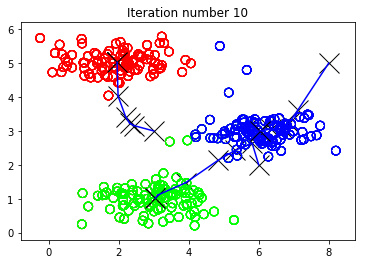

In [24]:
## =================== Part 3: K-Means Clustering ======================
#  After you have completed the two functions computeCentroids and
#  findClosestCentroids, you have all the necessary pieces to run the
#  kMeans algorithm. In this part, you will run the K-Means algorithm on
#  the example dataset we have provided. 
#
print('\nRunning K-Means clustering on example dataset.\n\n')

# Load an example dataset
mat = scipy.io.loadmat('data/ex7/ex7data2.mat')
X = mat["X"]

# Settings for running K-Means
K = 3
max_iters = 10

# For consistency, here we set centroids to specific values
# but in practice you want to generate them automatically, such as by
# settings them to be random examples (as can be seen in
# kMeansInitCentroids).
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Run K-Means algorithm. The 'true' at the end tells our function to plot
# the progress of K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters, True)
print('\nK-Means Done.\n')

In [27]:
def kMeansInitCentroids(X, K):
    #KMEANSINITCENTROIDS This function initializes K centroids that are to be 
    #used in K-Means on the dataset X
    #   centroids = KMEANSINITCENTROIDS(X, K) returns K initial centroids to be
    #   used with the K-Means on the dataset X
    #

    # You should return this values correctly
    centroids = np.zeros((K, X.shape[1]))

    # ====================== YOUR CODE HERE ======================
    # Instructions: You should set centroids to randomly chosen examples from
    #               the dataset X
    #

    # Initialize the centroids to be random examples
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    # Take the first K examples as centroids
    centroids = X[randidx[:K], :]

    # =============================================================

    return centroids

In [28]:
## ============= Part 4: K-Means Clustering on Pixels ===============
#  In this exercise, you will use K-Means to compress an image. To do this,
#  you will first run K-Means on the colors of the pixels in the image and
#  then you will map each pixel on to it's closest centroid.
#  
#  You should now complete the code in kMeansInitCentroids.m
#

print('\nRunning K-Means clustering on pixels from an image.\n\n')

#  Load an image of a bird
mat = scipy.io.loadmat('data/ex7/bird_small.mat')
A = mat["A"]

A = A / 255.0 # Divide by 255 so that all values are in the range 0 - 1

# Size of the image
img_size = A.shape

# Reshape the image into an Nx3 matrix where N = number of pixels.
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X that we will use K-Means on.
X = A.reshape(img_size[0] * img_size[1], 3, order='F').copy()

# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 16 
max_iters = 10

# When using K-Means, it is important the initialize the centroids
# randomly. 
# You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K)

# Run K-Means
centroids, idx = runkMeans(X, initial_centroids, max_iters)


Running K-Means clustering on pixels from an image.


K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...





Applying K-Means to compress an image.



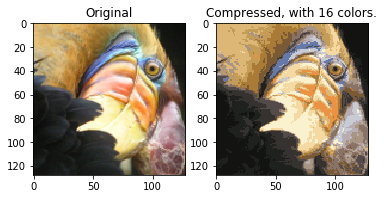

In [29]:
## ================= Part 5: Image Compression ======================
#  In this part of the exercise, you will use the clusters of K-Means to
#  compress an image. To do this, we first find the closest clusters for
#  each example. After that, we 

print('\nApplying K-Means to compress an image.\n')

# Find closest cluster members
idx = findClosestCentroids(X, centroids)

# Essentially, now we have represented the image X as in terms of the
# indices in idx. 

# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by it's index in idx) to the centroid value
X_recovered = centroids[idx,:]

# Reshape the recovered image into proper dimensions
X_recovered = X_recovered.reshape(img_size[0], img_size[1], 3, order='F')

# Display the original image
plt.close()
plt.subplot(1, 2, 1)
plt.imshow(A) 
plt.title('Original')

# Display compressed image side by side
plt.subplot(1, 2, 2)
plt.imshow(X_recovered)
plt.title( 'Compressed, with {:d} colors.'.format(K) )
plt.show(block=False)